In [2]:
import albumentations as A
from PIL import Image
import cv2
import numpy as np
import time
import os
import torch
import json
import torchvision
from glob import glob
from torch.utils.data import Dataset
from torchvision import transforms
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from ipywidgets import interact


In [3]:
img_num = '0614'
img_path = '/opt/ml/detection/dataset/train/' + str(img_num) + '.jpg'
img = Image.open(img_path)
bboxes = [[0, 0, 1, 1, 'paper']]
# bboxes = [[816.8, 96.2, 207.0, 702.3, 'paper'], 
#             [331.2, 418.9, 272.8, 393.8, 'paper'],
#             [272.3, 375.5, 731.2, 346.8,'paper']]
transform = A.Compose([
    #A.SmallestM#xSize(),
    #A.Transpose(p=1)
    #A.ShiftScaleRotate(p=1),
    #A.RandomSizedBBoxSafeCrop(1024,1024,p=1), # 굳
    #A.Resize(512, 512, p=1),
    #A.RandomScale(p=1)
    #A.RandomResizedCrop(512, 512, p=1)
    #A.CropAndPad(percent=0.5)
    #A.Affine(p=1)
    #A.RandomRotate90(p=1)
    #A.MotionBlur(blur_limit=7,p=1)
    A.CLAHE(clip_limit=4.0, tile_grid_size=(15,15), p=1), # 굳
    #A.ColorJitter(p=1)
    #A.MedianBlur(p=1)
    #A.RandomRain(p=1) # 굳
    #A.RandomSnow(p=1)
    #A.RandomSunFlare(p=1)
    #A.RandomToneCurve(p=1) # 굳
    #A.ChannelDropout(p=1)
    #A.ChannelShuffle(p=1)
    #A.HueSaturationValue(p=1)
    #A.RandomBrightnessContrast(brightness_limit=[0.0,0.0], contrast_limit=[0.1,1.0], p=1) #굳
], bbox_params=A.BboxParams(format='coco'))

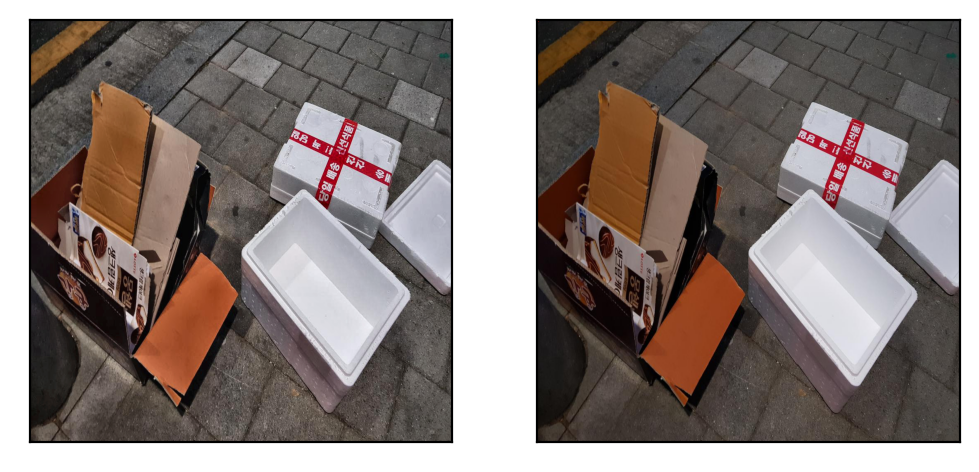

In [111]:
new_info = transform(image=np.asarray(img), bboxes=bboxes)
new_img = new_info['image']
new_box = new_info['bboxes']
fig, ax = plt.subplots(1, 2, dpi=200)
for i in range(len(new_box)):
    ax[1].add_patch(
                patches.Rectangle(
                    (bboxes[i][0],bboxes[i][1]), bboxes[i][2], bboxes[i][3],
                    edgecolor='red',
                    fill=False,
                    ),
                )
    ax[0].add_patch(
                patches.Rectangle(
                    (new_box[i][0],new_box[i][1]), new_box[i][2], new_box[i][3],
                    edgecolor='red',
                    fill=False,
                    ),
                )
ax[0].set_xticks([]) 
ax[0].set_yticks([])
ax[1].set_xticks([]) 
ax[1].set_yticks([])
ax[0].imshow(new_img)
ax[1].imshow(img)

save = True
if save:
    augmentation_name = 'CLAHE'
    if not os.path.exists('/opt/ml/z_customs/'+augmentation_name):
        os.makedirs('/opt/ml/z_customs/CLAHE')
    plt.savefig(os.path.join('/opt/ml/z_customs', augmentation_name, str(img_num)+'.jpg'))

4871


In [22]:
img_list = sorted(glob(os.path.join('/opt/ml/detection/dataset/test', '*.jpg')))
transform = A.Compose([
    #A.SmallestM#xSize(),
    #A.Transpose(p=1)
    #A.ShiftScaleRotate(p=1),
    #A.RandomSizedBBoxSafeCrop(1024,1024,p=1), # 굳
    #A.Resize(512, 512, p=1),
    #A.RandomScale(p=1)
    #A.RandomResizedCrop(512, 512, p=1)
    #A.CropAndPad(percent=0.5)
    #A.Affine(p=1)
    #A.RandomRotate90(p=1)
    #A.MotionBlur(blur_limit=7,p=1)
    A.CLAHE(clip_limit=4.0, tile_grid_size=(15,15), p=1), # 굳
    #A.ColorJitter(p=1)
    #A.MedianBlur(p=1)
    #A.RandomRain(p=1) # 굳
    #A.RandomSnow(p=1)
    #A.RandomSunFlare(p=1)
    #A.RandomToneCurve(p=1) # 굳
    #A.ChannelDropout(p=1)
    #A.ChannelShuffle(p=1)
    #A.HueSaturationValue(p=1)
    #A.RandomBrightnessContrast(brightness_limit=[0.0,0.0], contrast_limit=[0.1,1.0], p=1) #굳
])
for fname in img_list:
    img = Image.open(fname)
    new_img = transform(image=np.asarray(img))['image']
    new_img_PIL = Image.fromarray(new_img)
    new_fname = fname.split('/')[-1]
    new_img_PIL.save(os.path.join('/opt/ml/detection/dataset/test_CLAHE', new_fname), 'JPEG')

In [28]:
with open('/opt/ml/detection/dataset/test.json', 'r') as file:
    test_json = json.load(file)

for idx, img_ann in enumerate(test_json['images']):
    fname = img_ann['file_name'].split('/')
    fname[0]+='_CLAHE'
    new_fname = '/'.join(fname)
    test_json['images'][idx]['file_name'] = new_fname
    
with open('/opt/ml/detection/dataset/test_CLAHE.json', 'w') as file:
    json.dump(test_json, file, indent='\t')

# Cutout test

In [38]:
with open('/opt/ml/detection/dataset/SK_train_annotations.json', 'r') as file:
    train_json = json.load(file)
    train_img = train_json['images']
    train_ann = train_json['annotations']
print(train_img[0])
print(train_ann[0])

{'width': 1024, 'height': 1024, 'file_name': 'train/0000.jpg', 'license': 0, 'flickr_url': None, 'coco_url': None, 'date_captured': '2020-12-26 14:44:23', 'id': 0}
{'image_id': 0, 'category_id': 0, 'area': 257301.66, 'bbox': [197.6, 193.7, 547.8, 469.7], 'iscrowd': 0, 'id': 0}


In [44]:
@interact(idx=(0, len(train_img)))
def showImg(idx=0):
    h, w, c = train_img[idx]['height'],train_img[idx]['width'],3
    img_id = train_img[idx]['id']
    img = np.asarray(Image.open(os.path.join('/opt/ml/detection/dataset', train_img[idx]['file_name'])))
    anns = []
    for ann in train_ann:
        if(ann['image_id']==img_id):
            anns.append(ann)
    
    if_make_holes = np.random.randint(0, 2, len(anns))

    fig, axes = plt.subplots(len(anns)+1, 1, figsize=(10*len(anns),10*len(anns)))
    
    axes = axes.flatten()
    idx = 0
    for i, flag in enumerate(if_make_holes):
        ann = anns[i]
        gt_bboxes = ann['bbox']
        if flag:
            x1 = np.random.randint(int(gt_bboxes[0]), int(gt_bboxes[0]+gt_bboxes[2]))
            y1 = np.random.randint(int(gt_bboxes[1]), int(gt_bboxes[1]+gt_bboxes[3]))
            cutout_w = (gt_bboxes[2])//3
            cutout_h = (gt_bboxes[3])//3

            x2 = int(np.clip(x1 + cutout_w, int(gt_bboxes[0]), int(gt_bboxes[0]+gt_bboxes[2])))
            y2 = int(np.clip(y1 + cutout_h, int(gt_bboxes[1]), int(gt_bboxes[3]+gt_bboxes[1])))
            img[y1:y2, x1:x2, :] = (0,0,0)
            area = (gt_bboxes[0], gt_bboxes[1], gt_bboxes[2]+gt_bboxes[0], gt_bboxes[3]+gt_bboxes[1])
            cropped_img = Image.fromarray(img).crop(area)
            axes[idx].imshow(cropped_img)
        else:
            area = (gt_bboxes[0], gt_bboxes[1], gt_bboxes[2]+gt_bboxes[0], gt_bboxes[3]+gt_bboxes[1])
            cropped_img = Image.fromarray(img).crop(area)
            axes[idx].imshow(cropped_img)
        axes[idx].set_xticks([])
        axes[idx].set_yticks([])
        idx+=1
    axes[idx].imshow(img)


interactive(children=(IntSlider(value=0, description='idx', max=4260), Output()), _dom_classes=('widget-intera…